# Проект по теме: "Принятие решения в бизнесе на основе данных"

## Описание проекта

Я есть Грут(аналитик крупного интернет-магазина).Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.Приоритизируем их, запустим A/B-тест и проанализируем результаты.

### Описание данных

#### Данные для первой части

Датасет *hypothesis*:
+ Hypothesis — краткое описание гипотезы;
+ Reach — охват пользователей по 10-балльной шкале;
+ Impact — влияние на пользователей по 10-балльной шкале;
+ Confidence — уверенность в гипотезе по 10-балльной шкале;
+ Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Датасет *orders*:
+ transactionId — идентификатор заказа;
+ visitorId — идентификатор пользователя, совершившего заказ;
+ date — дата, когда был совершён заказ;
+ revenue — выручка заказа;
+ group — группа A/B-теста, в которую попал заказ.


Датасет *visitors*:
+ date — дата;
+ group — группа A/B-теста;
+ visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В датасете **hypothesis** приведем название столбцов к нижнему регистру, а в датасетах **orders** и **visitors** нужно поменять тип данных в столбцах с датой.

### Часть 1. Приоритизация гипотез.

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()#Приведём название столбцов к нижнему регистру.
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Мы имеем 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach, Impact, Confidence, Efforts*. Приоритезируем их с помощью фреймворков **ICE** и **RICE**.

#### ICE

In [10]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])

In [11]:
hypothesis.loc[:, ['hypothesis','ICE']].sort_values('ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.0
0,"Добавить два новых канала привлечения трафика,...",13.0
7,Добавить форму подписки на все основные страни...,11.0
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
3,"Изменить структура категорий, что увеличит кон...",1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0


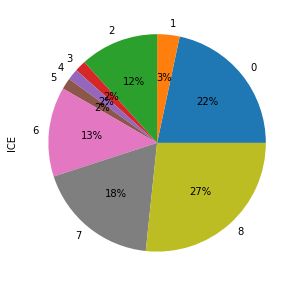

In [12]:
hypothesis.plot(kind='pie', y='ICE', autopct='%1.0f%%', figsize=(10, 5), legend=False)
plt.show()

Наиболее перспективные по ICE: 8,0,7,6,2

#### RICE

In [13]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'] 

In [14]:
hypothesis.loc[:, ['hypothesis','RICE']].sort_values('RICE',ascending = False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


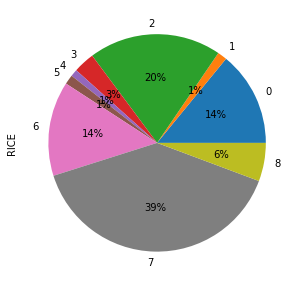

In [15]:
hypothesis.plot(kind='pie', y='RICE', autopct='%1.0f%%', figsize=(10, 5), legend=False)
plt.show()

Наиболее перспективные по RICE: 7,2,0,6,8. Те же гипотезы, только в другой последовательности. Теперь гипотеза с индексом 7 на первом месте, потому что у неё **10** в столбце **reach**. Помимо силы влияния, так же важно сколько пользователей она затронет.


### Часть 2. Анализ A/B-теста

In [16]:
# В датасетах orders и visitors поменяем тип данных в столбцах с датой на datetime64.
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

***Соберём кумулятивные данные для построения графиков из таблицы orders.***

In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [19]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


***По аналогии с orders, соберём кумулятивные данные  из таблицы visitors.***

In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


***Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge().***

In [24]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [25]:
cummulativeData

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


***Всё готово к построению графиков!***

### 1.Построим график кумулятивной выручки по группам.

Объявим переменные *cumulativeRevenueA и cumulativeRevenueB*, в которых сохраним данные о датах, выручке и числе заказов в группах A и B, и построим график по ним.

In [26]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'transactionId']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'transactionId']]

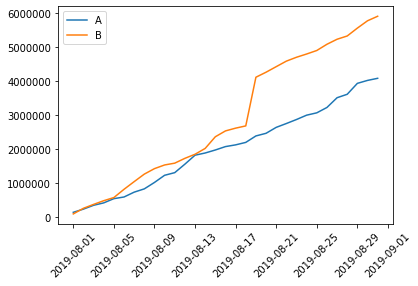

In [27]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend();

**Группа B** почти сразу вышла вперёд и лидировала до конца теста, но резкий скачок в середине графика нам указывает на присутствие аномальных значений в данных.

### 2.Построим график кумулятивного среднего чека по группам.

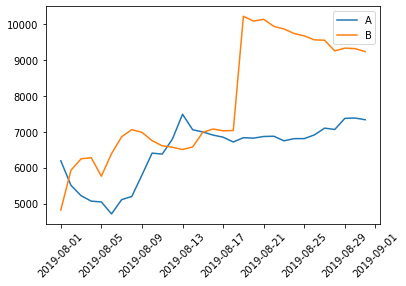

In [28]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['transactionId'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['transactionId'], label='B')
plt.xticks(rotation=45)
plt.legend();

Кумулятивные данные среднего чека сильно колеблются. Нужно проанализировать аномалии, по этой метрике пока рано делать выводы.

### 3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [29]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCummulativeRevenue.head()

,date,revenueA,transactionIdA,revenueB,transactionIdB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


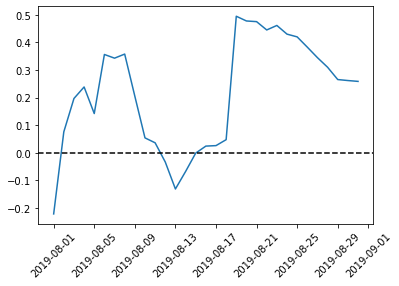

In [30]:
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['transactionIdB'])/\
(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['transactionIdA'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

Относительное изменение кумулятивного среднего чека группы B к группе А, как и в предыдущем тесте, так же сильно изменялось на протяжение теста, что указывает нам на аномальные заказы.

### 4.Построим график кумулятивной конверсии по группам.

In [31]:
cummulativeData['conversion'] = cummulativeData['transactionId']/cummulativeData['visitors']# найдём общую конверсию.

In [32]:
#Разделим конверсию по группам
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

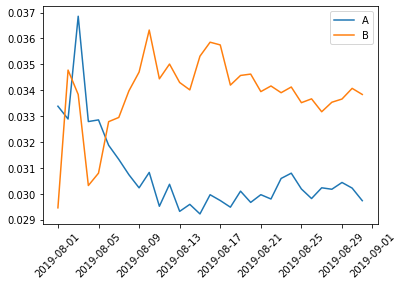

In [33]:
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend();

В начале группа А имела большую конверсию, но примерно, после недели теста, группа B вышла вперёд и лидировала до конца теста

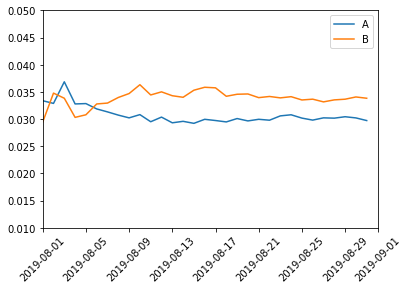

In [34]:
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.axis(["2019-08-01", '2019-09-01', 0.01, 0.05])
plt.legend();

Отдалив масштаб, мы увидели, что конверсия установилась около своего среднего значения. На первом графике, может показаться, что колебания продолжаются.

### 5.Построим график относительного изменения кумулятивной конверсии группы B к группе A.

In [35]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

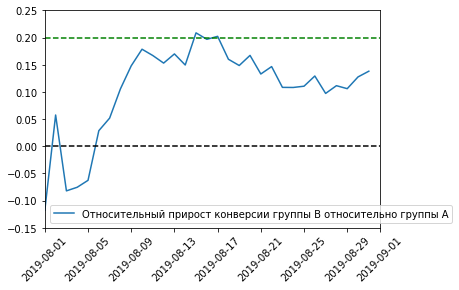

In [36]:
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.15, 0.25]);

Почти сразу группа B вышла вперёд по конверсии и лидировала до конца теста, зафиксировавшись около прироста 17-20% относительно группы А.

### 6.Построим точечный график количества заказов по пользователям.

In [37]:
#Посчитаем количество заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [38]:
#Отсортируем их по убыванию
ordersByUsers.sort_values(by='transactionId',ascending=False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


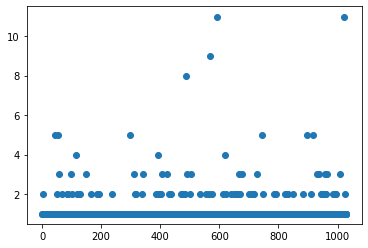

In [39]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId']);

Большинство делают 1 заказ, но так же много пользователей с 2-3 заказами, их точная доля не ясна, нужно посчитать перцентили.

### 7.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [40]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей заказывали больше 2 заказов. И не более 1% больше 4. Возьмём 4 заказа на одного пользователя за нижнюю границу заказов, и отсеем аномальных пользователей по ней.

### 8.Построим точечный график стоимостей заказов.

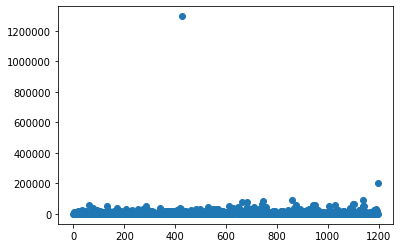

In [41]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Как и предполагали раньше,есть несколько выбросов из общего числа стоимостей заказов, один из них больше 1 млн 200 тысяч. Нужно посчитать перцентили.


### 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Возьмём стоимость равную 58233.2 рубля за нижнюю границу заказов, и отсеем аномальных пользователей по ней.

### 10.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Начнём с подготовки данных:

In [43]:
#Отсортируем группу А от группы B в датасете visitors
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [44]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [45]:
#Найдём коммулятивное кол-во пользователей до выбранной даты включительно по группам А и B
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [46]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [47]:
#Найдём кол-во заказов и суммарную выручку в выбранную дату, в выбранной группе А и В
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [48]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [49]:
#Найдём коммулятивное кол-во заказов и суммарную выручку в выбранную дату, в выбранной группе А и В
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [50]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [51]:
#Соединим все эти таблицы в одну с помощьб метода merge()
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [52]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


***Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.***

In [53]:
#Посчитаем,  по группам,число совершённых заказов пользователями, которые заказывали хотя бы 1 раз 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [54]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [55]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [56]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [57]:
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])#Значение критерия Манна-Уитни.

'0.008'

In [58]:
"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)#Cтатистическую значимость различий в конверсии между группами по «сырым» данным

'0.138'

Значение критерия Манна-Уитни равно 0.008, а это меньше 0.01.Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, **отвергаем**.

***Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.***

### 11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [59]:
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.365'

In [60]:
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

P-value больше 0.01 — статистически значимых отличий в среднем чеке между группами нет. Средний чек группы B значительно больше (***25.9%***), чем группы А.

### 12.Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [61]:
#Сделаем срезы пользователей с числом заказов больше 4 и пользователей, совершивших заказы дороже 58233.2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [62]:
abnormalUsers.head()

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

In [63]:
abnormalUsers.shape# количество аномальных пользователей

(15,)

In [64]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [65]:
"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.007'

In [66]:
"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.153'

Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.Результаты стали немного чище.

### 13.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [67]:
"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'0.425'

In [68]:
"{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'-0.006'

P-value по прежнему больше 0.01 — статистически значимых отличий в среднем чеке между группами нет.  А вот средний чек группы B стал практически равен среднему чеку группы А, видимо тот покупатель на 1 млн. 200 тысяч был в группе B.

### Вывод


Несмотря на то, что средний чек после удаления аномалий в группе B стал равный среднему чеку группы А, по всем остальным параметрам группа B лучше. ***Принимаем решение остановить тест, зафиксировать победу группы B.***